# Part I - Exploring Ford GoBike System Data 
## by Nsikanabasi Essiet

### Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#wrangling)
- [Part 1 - Univariate Exploration](#univariate)
- [Part 2 - Bivariate Exploration](#bivariate)
- [Part 3 - Multivariate Exploration](#multivariate)
- [Conclusion](#conclude)


<a id='intro'></a>
## Introduction
> Ford GoBike System Data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in USA.
In the dataset, there are 183412 records of fordgobike trips and 16 specifications(`duration_sec`: duration of bike trip, `start_time`: date and time of the trip, `end_time`: date and time of trip ending, `start_station_id`: start station code, `start_station_name`: name of the trip start station, `start_station_latitude`, `start_station_longitude`, `end_station_id`: trip end station code, `end_station_name`: name of trip end station, `end_station_latitude`, `end_station_longitude`, `bike_id`: code of bikes used for the trip, `user_type`: category of bike users; either customer or subscriber, `member_birth_year`: birth year of bike users, `member_gender`: gender of individual bike users, `bike_share_for_all_trip`: a categorical column, 'Yes' if a person shared bike while on trip, and 'No' if not). 


The aim of this project is to explore and explain trends with a column or set of columns through visualisation.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Load in the data
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Check the struture of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

<a id='wrangling'></a>
## Preliminary Wrangling

In [4]:
# Check unique values in bike_share_for_all_trip column
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

In [5]:
# Check Unique user types
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [6]:
# Check unique genders
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [7]:
# Check for NaNs
df[df.member_gender.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [8]:
# Check dtypes of features
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [9]:
# Check data structure
df.shape

(183412, 16)

### What is the structure of your dataset?

> Answer: This dataset has 16 features (`duration_sec`, `start_time`, `end_time`, `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`, `bike_id`, `user_type`, `member_birth_year`, `member_gender`, `bike_share_for_all_trip`) and 183412 bike ride trips. 9 features are quantitative while 7 are qualitative.

### What is/are the main feature(s) of interest in your dataset?

> Answer: `duration_sec` and `member_birth_year`

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Answer: `start_time`, `end_time`, `start_station_id`, `end_station_id`, `bike_id`, `user_type`, `member_gender`, and `bike_share_for_all_trip`

### Data Quality Issues<br>
1. `time` columns are object instead of Datetime or Timestamp<br>

2. `latitude` and `longitude` and `ids` are numeric instead of object


3. `member_birth_year` is float instead of int but is okay since it will serve the analysis just fine


4. `user_type`, `member_gender`, and `bike_share_for_all_trip` columns are object instead of binary

In [10]:
# Change to datetime

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Change dtype to Categorical
df['user_type'] = pd.Categorical(df['user_type'])
df.bike_share_for_all_trip = pd.Categorical(df.bike_share_for_all_trip)

df['member_gender'] = pd.Categorical(df['member_gender'])
df.duration_sec = df.duration_sec.astype(float)

In [11]:
# Change dtypes from numerical to object

df[['start_station_latitude',
    'start_station_id', 
    'end_station_id',
    'start_station_longitude', 
    'end_station_latitude', 
    'end_station_longitude']] = df[['start_station_latitude', 
                                    'start_station_id', 
                                    'end_station_id',
                                    'start_station_longitude', 
                                    'end_station_latitude',
                                    'end_station_longitude']].astype(object)


In [12]:
# Form new features and convert to appropriate dtypes

df['start_day'] = pd.Categorical(df.start_time.dt.day_name())
df['trip_start_time'] = df.start_time.dt.time
df['end_day'] = pd.Categorical(df.end_time.dt.day_name())
df['trip_end_time'] = df.end_time.dt.time

In [13]:
# Check dtypes to confirm the changes are effected
df.dtypes

duration_sec                      float64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude             object
start_station_longitude            object
end_station_id                     object
end_station_name                   object
end_station_latitude               object
end_station_longitude              object
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
start_day                        category
trip_start_time                    object
end_day                          category
trip_end_time                      object
dtype: object

In [14]:
# Store dataframe
df.to_csv('df_for_viz.csv', index=False)

<a id='univariate'></a>
## Univariate Exploration

## Question: Which day of the week are most trips taken?

The bar chart below shows the frequency of trips for all start day of trips from 1st to 28th February 2019. The graph shows that most trips start day is Thursday with trip frequency of 35197, followed by Tuesday with frequency of 31813, followed by Wednesday with frequency of 29641, followed by Friday with frequency of 28981, followed by Monday with frequency of 26852, followed by Sunday with frequency of 15523. Saturday has the least frequency of 15405. 

In [15]:
start_day_count = df.start_day.value_counts()
end_day_count = df.end_day.value_counts()

In [16]:
start_day_count

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: start_day, dtype: int64

In [17]:
end_day_count

Thursday     35185
Tuesday      31820
Wednesday    29631
Friday       28981
Monday       26859
Sunday       15523
Saturday     15413
Name: end_day, dtype: int64

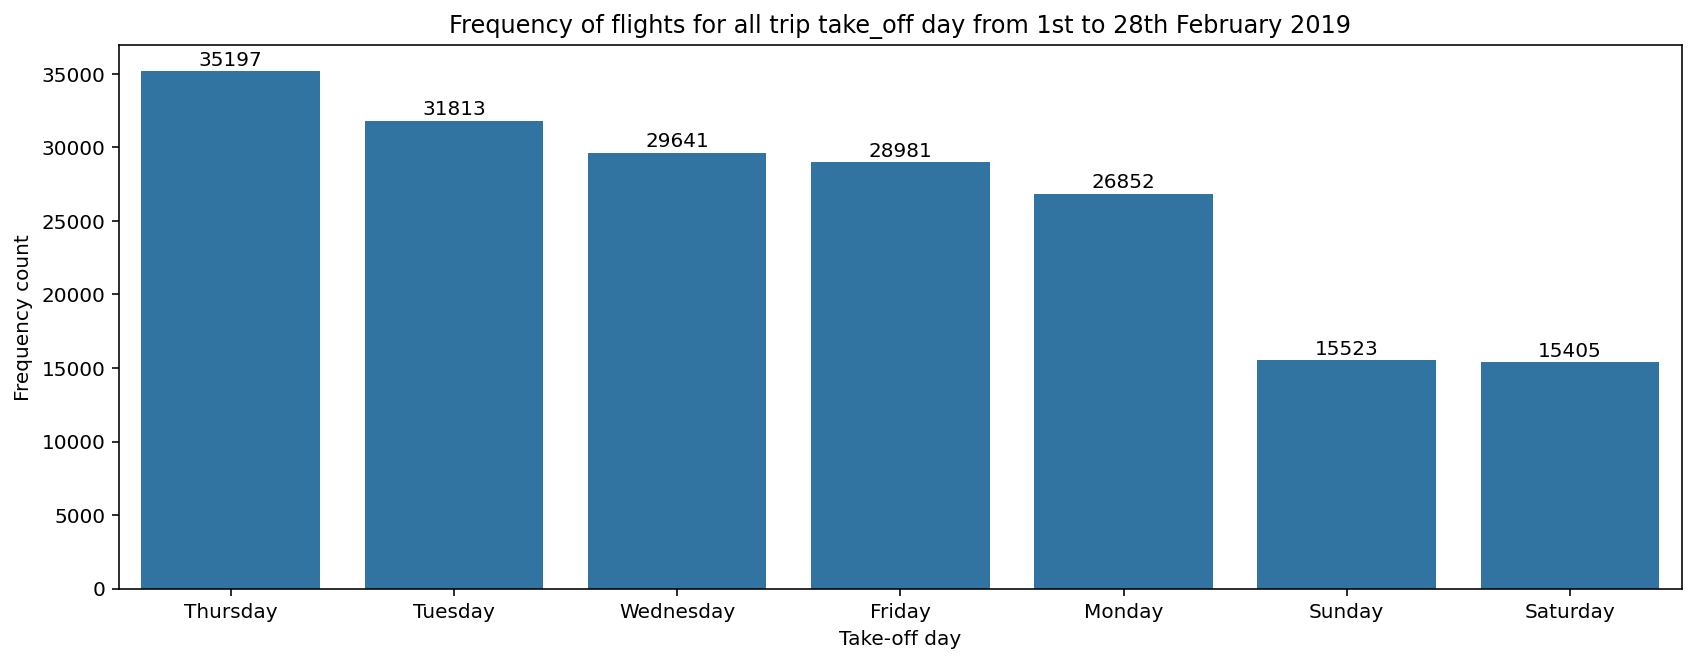

In [18]:
def start_day_bar():
    colour = sns.color_palette()[0]
    plt.figure(figsize=[14, 5])

    sns.barplot(x =start_day_count.index, y = start_day_count, color= colour, order= start_day_count.index);
    plt.xlabel('Take-off day')
    plt.ylabel('Frequency count')
    plt.title('Frequency of flights for all trip take_off day from 1st to 28th February 2019')

    for i in range(start_day_count.shape[0]):
        count = start_day_count[i]
        plt.text(i, count+1400, count, ha = 'center', va = 'top')
start_day_bar()

## Question: Which day of the week has most ending trips?

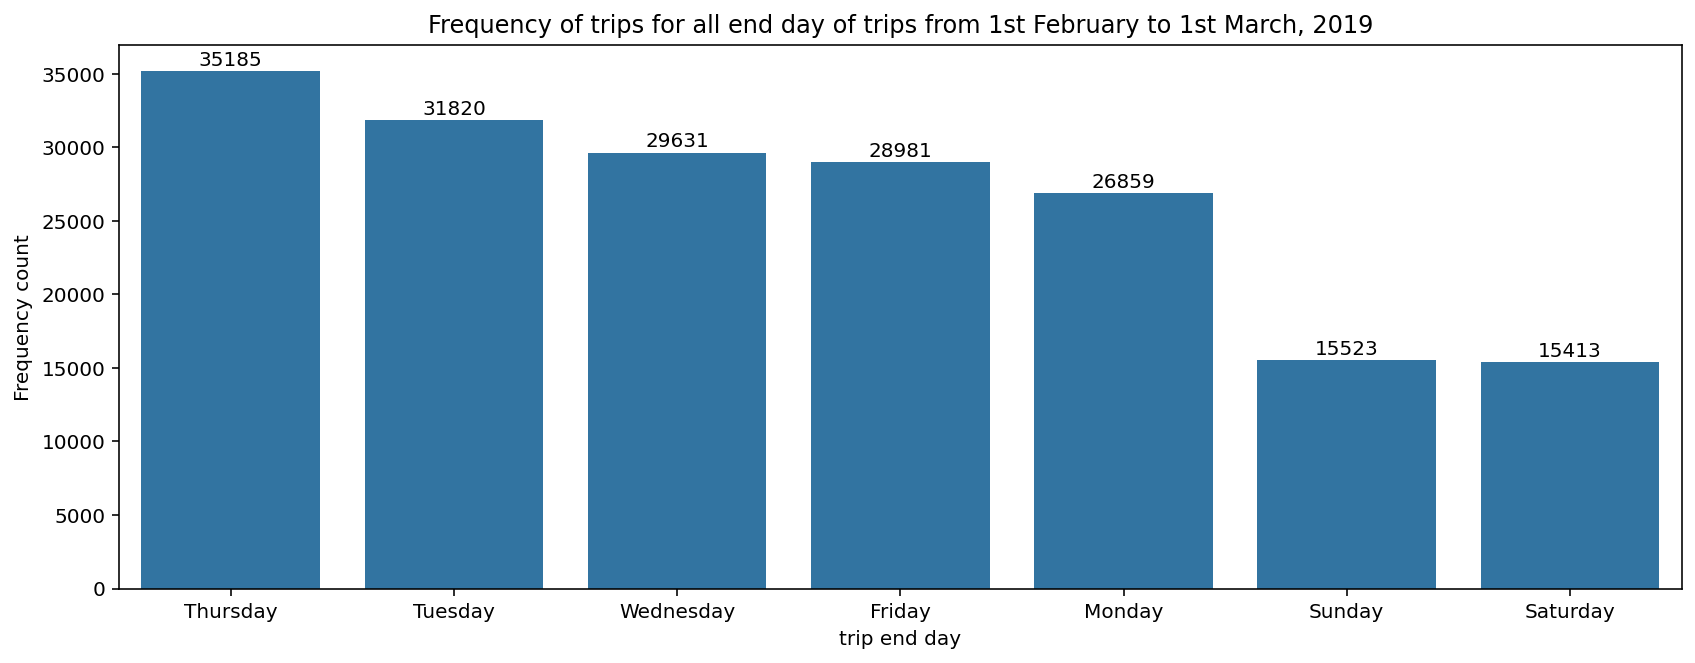

In [19]:
def end_trip_bar():
    plt.figure(figsize=[14, 5])
    colour = sns.color_palette()[0]
    sns.barplot(x =end_day_count.index, y = end_day_count, color= colour, order= end_day_count.index);
    plt.xlabel('trip end day')
    plt.ylabel('Frequency count')
    plt.title('Frequency of trips for all end day of trips from 1st February to 1st March, 2019')

    for i in range(end_day_count.shape[0]):
        count = end_day_count[i]
        plt.text(i, count+1400, count, ha = 'center', va = 'top')
end_trip_bar()

## Question: Which trip duration has the highest frequency 

Answer: The Histogram below shows a distribution of trip duration. It looks fairly symmetric with one prominent peak
The column was right skewed so I employed log transformation on it. 
Finally, I made sure I used the right x_ticks for readability and interpretability
From the graph, it is obvious that around 600 seconds has the largest frequency of about 25000.
It seems most of the trips are below 1000 seconds duration.

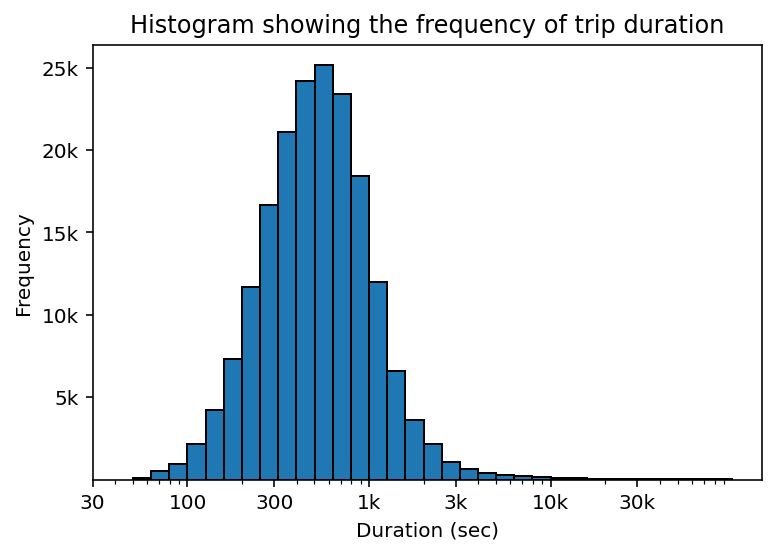

In [20]:
def trip_hist():
    bins = 10**np.arange(1.7, 4.94+0.1, 0.1)

    x_ticks = [30,100,300,1000,3000,10000,30000]
    x_label = ['30', '100', '300', '1k', '3k', '10k', '30k']
    y_ticks = [5000, 10000, 15000, 20000, 25000]
    y_labels = ['5k', '10k', '15k', '20k', '25k']
    plt.hist(df.duration_sec, bins = bins, edgecolor= 'black');
    plt.xscale('log')
    plt.xticks(x_ticks, x_label);
    plt.yticks(y_ticks, y_labels)
    plt.xlabel('Duration (sec)')
    plt.ylabel('Frequency')
    plt.title('Histogram showing the frequency of trip duration');
trip_hist()

## Question: What is trip distribution like for start time and end time?

Answer: The two histograms below show the frequencies of trips take-off and ending times.
I used a bin size of 24 for both plots since I am dealing with hours. So each bin represents a unique hour. 
Both graphs are bi-modal and look roughly the same with 17:00 as the hour with highest trip take-off and ending,
and 03:00 with the least.

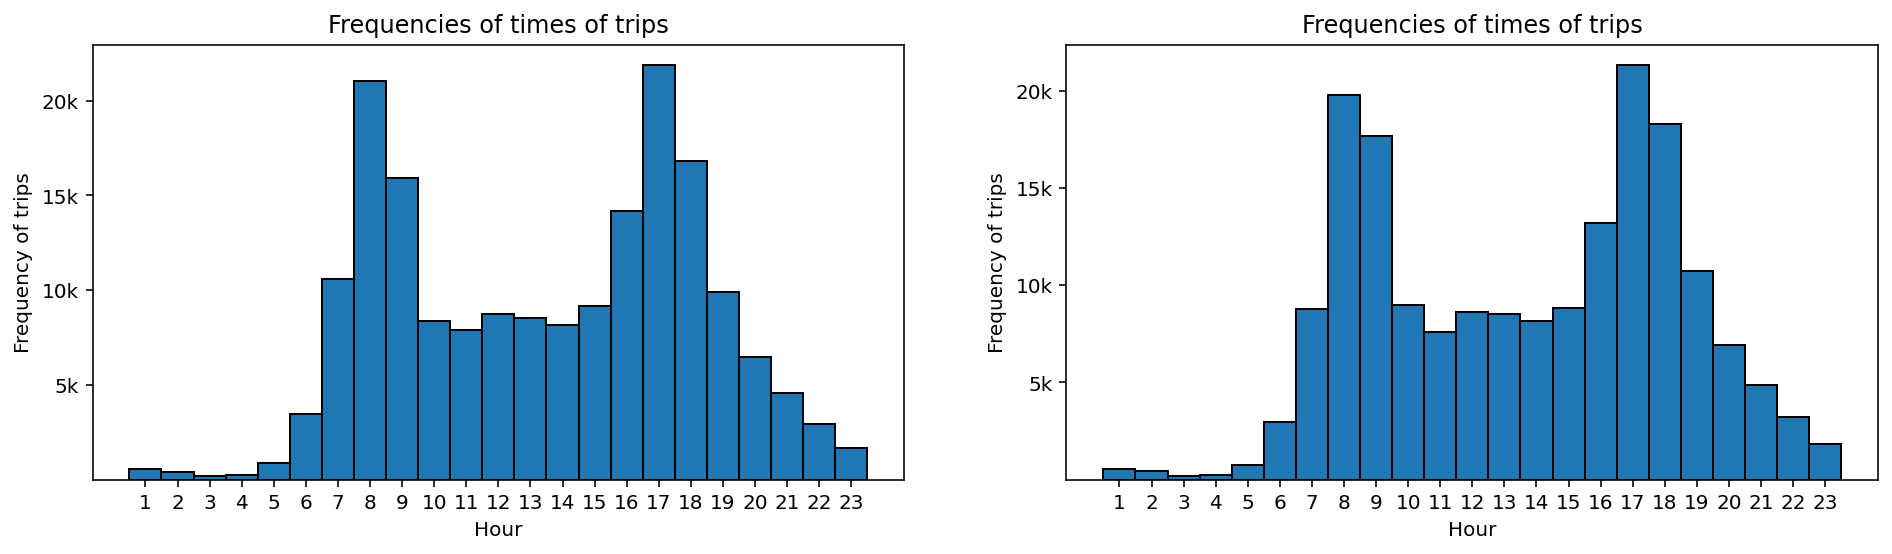

In [21]:
def trips_times_hist():
    plt.figure(figsize=[16, 4])

    plt.subplot(121)
    bins = np.arange(0.5,23.5+1, 1)
    ax = plt.hist(df.start_time.dt.hour, bins = bins, edgecolor = 'black');
    plt.xticks(np.arange(1,24, 1));
    y_ticks = [5000, 10000, 15000, 20000]
    y_labels = ['5k', '10k', '15k', '20k']
    plt.yticks(y_ticks, y_labels);
    plt.xlabel('Hour')
    plt.ylabel('Frequency of trips')
    plt.title('Frequencies of times of trips');

    plt.subplot(122)
    plt.hist(df.end_time.dt.hour, bins = bins, edgecolor = 'black');
    plt.xticks(np.arange(1,24, 1));
    y_ticks = [5000, 10000, 15000, 20000]
    y_labels = ['5k', '10k', '15k', '20k']
    plt.yticks(y_ticks, y_labels);
    plt.xlabel('Hour')
    plt.ylabel('Frequency of trips')
    plt.title('Frequencies of times of trips');
trips_times_hist()

## Question: Which member birth year has the highest flight distribution 

Answer: The Histogram below shows the distribution of member birth years. It is left skewed with a long tail so I had to zoom in to get an insight. The histogram is fairly unimodal, with highest number of distribution around the year 1987. It shows a constant rise in bike trips of users who where born between 1940 and 1990 and a somwhat continuous decrease till 2000.  

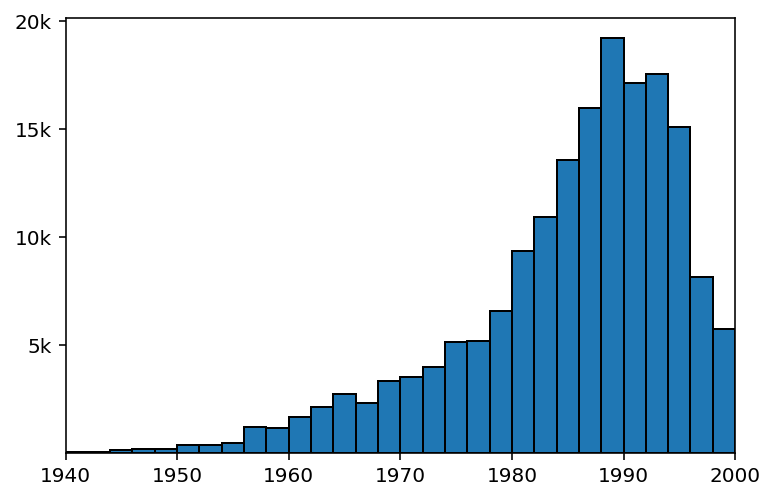

In [22]:
def year_hist():
    bins = np.arange(1878, 2001+2, 2)
    plt.hist(df.member_birth_year, bins = bins, edgecolor = 'black');
    plt.xlim(1940, 2000)
    y_ticks = [5000, 10000, 15000, 20000]
    y_labels = ['5k', '10k', '15k', '20k']
    plt.yticks(y_ticks, y_labels);
year_hist()

## Question: What is the distribution of bike share for all trips?

Answer: Bike share for all trips is a binary column with values: 'yes' and 'no'. In the bar chart below, about 166053 people shared bike while around 17359 people didn't

In [23]:
bike_share = df.bike_share_for_all_trip.value_counts()
bike_share

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

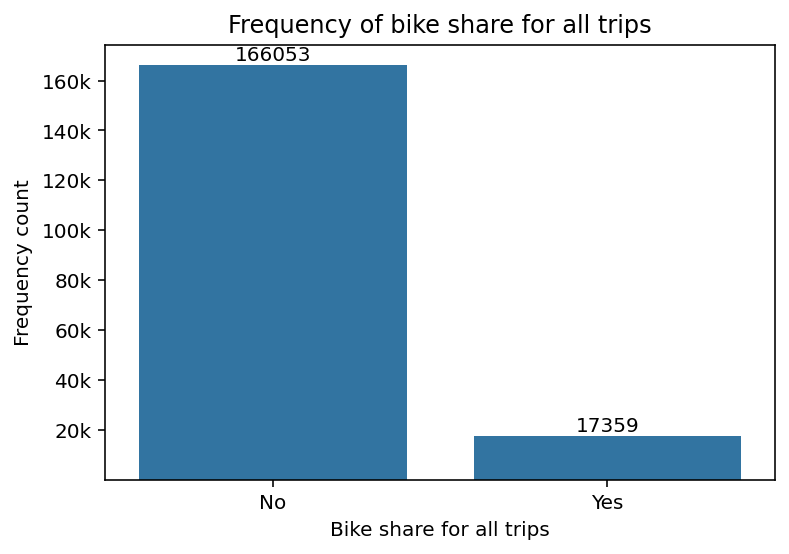

In [24]:
def bike_share_bar():
    colour = sns.color_palette()[0]
    sns.barplot(x =bike_share.index, y = bike_share, color= colour);
    plt.xlabel('Bike share for all trips')
    plt.ylabel('Frequency count')
    plt.title('Frequency of bike share for all trips')

    for i in range(bike_share.shape[0]):
        count = bike_share[i]
        plt.text(i, count+8000, count, ha = 'center', va = 'top')

    y_ticks = [20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000]
    y_labels = ['20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k']
    plt.yticks(y_ticks, y_labels);
bike_share_bar()

## Question: What is the distribution of users across the dataset?

Answer: user_type column has binary values: 'Subscriber' and 'Customer'. In the bar chart below, Subscribers are more than Customers with a ratio of about 166k to about 18k.

In [25]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

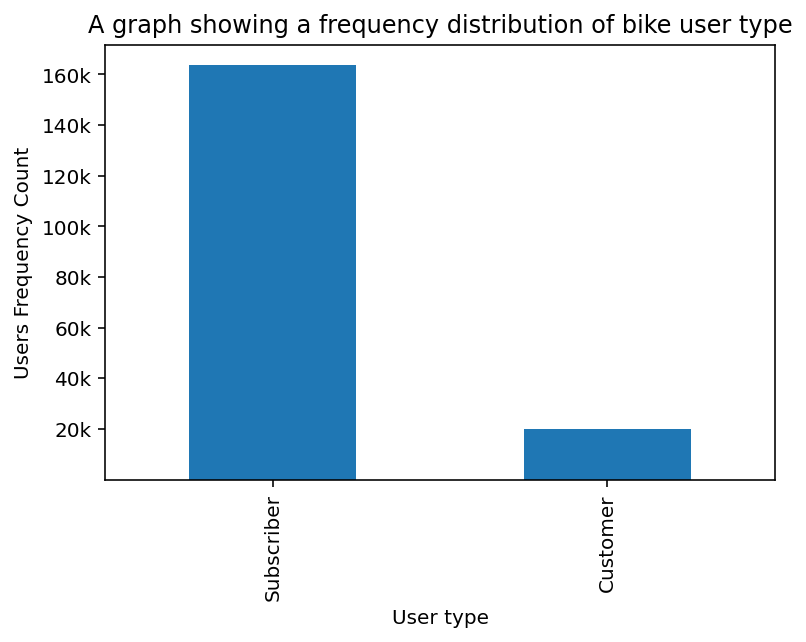

In [26]:
def user_type_bar():
    df.user_type.value_counts().plot(kind = 'bar')
    plt.xlabel('User type')
    plt.ylabel('Users Frequency Count')
    plt.title('A graph showing a frequency distribution of bike user type');
    y_ticks = [20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000]
    y_labels = ['20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k']
    plt.yticks(y_ticks, y_labels);
user_type_bar()

## Question: What is the distribution of users across the dataset?

Answer: The bar chart below shows the distribution of gender across users in the dataset. Here, there are three gender categories: Male, Female, and Other. There are NaNs in the column though. From this graph, Male users dominate with a frequency of 130651, followed by Female with frequency of 40844. Other has the least frequency count of 3652.  

In [27]:
member_gender = df.member_gender.value_counts()
member_gender

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

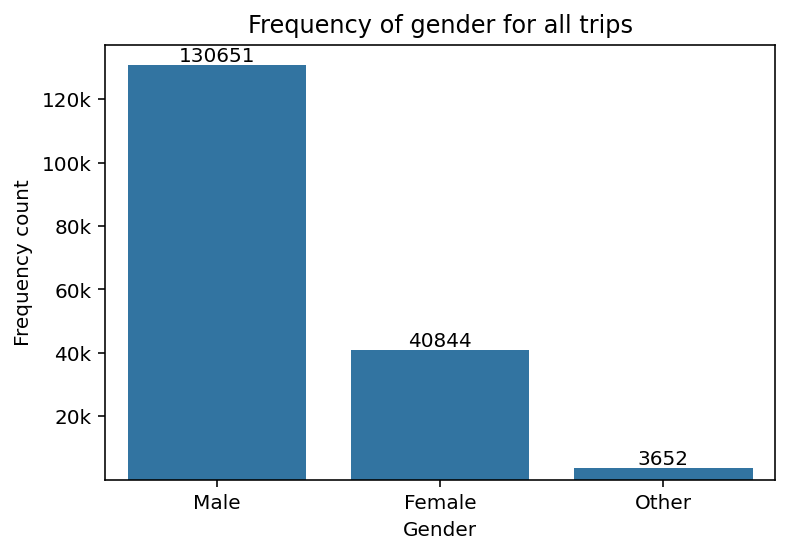

In [28]:
def gender_bar():
    colour = sns.color_palette()[0]
    sns.barplot(x = member_gender.index, y = member_gender, color=colour, order=['Male', 'Female', 'Other']);

    plt.xlabel('Gender')
    plt.ylabel('Frequency count')
    plt.title('Frequency of gender for all trips')

    for u in range(member_gender.shape[0]):
        count = member_gender[u]
        plt.text(u, count+6000, count, ha = 'center', va = 'top')

    y_ticks = [20000, 40000, 60000, 80000, 100000, 120000]
    y_labels = ['20k', '40k', '60k', '80k', '100k', '120k']
    plt.yticks(y_ticks, y_labels);
gender_bar()

In [29]:
df.start_station_id.max(),df.start_station_id.min()

(398.0, 3.0)

## Question: What is the distribution of start_station_id and end_station_id across the dataset?

The histogram below displays a distribution of various frequencies of `start_station_id` and `end_station_id`. 
I used bin width of 10.
For both ids, 13 has the highest distribution of dataset with a total frequency of about 16000 while 223 has the least total frequency of around 1000

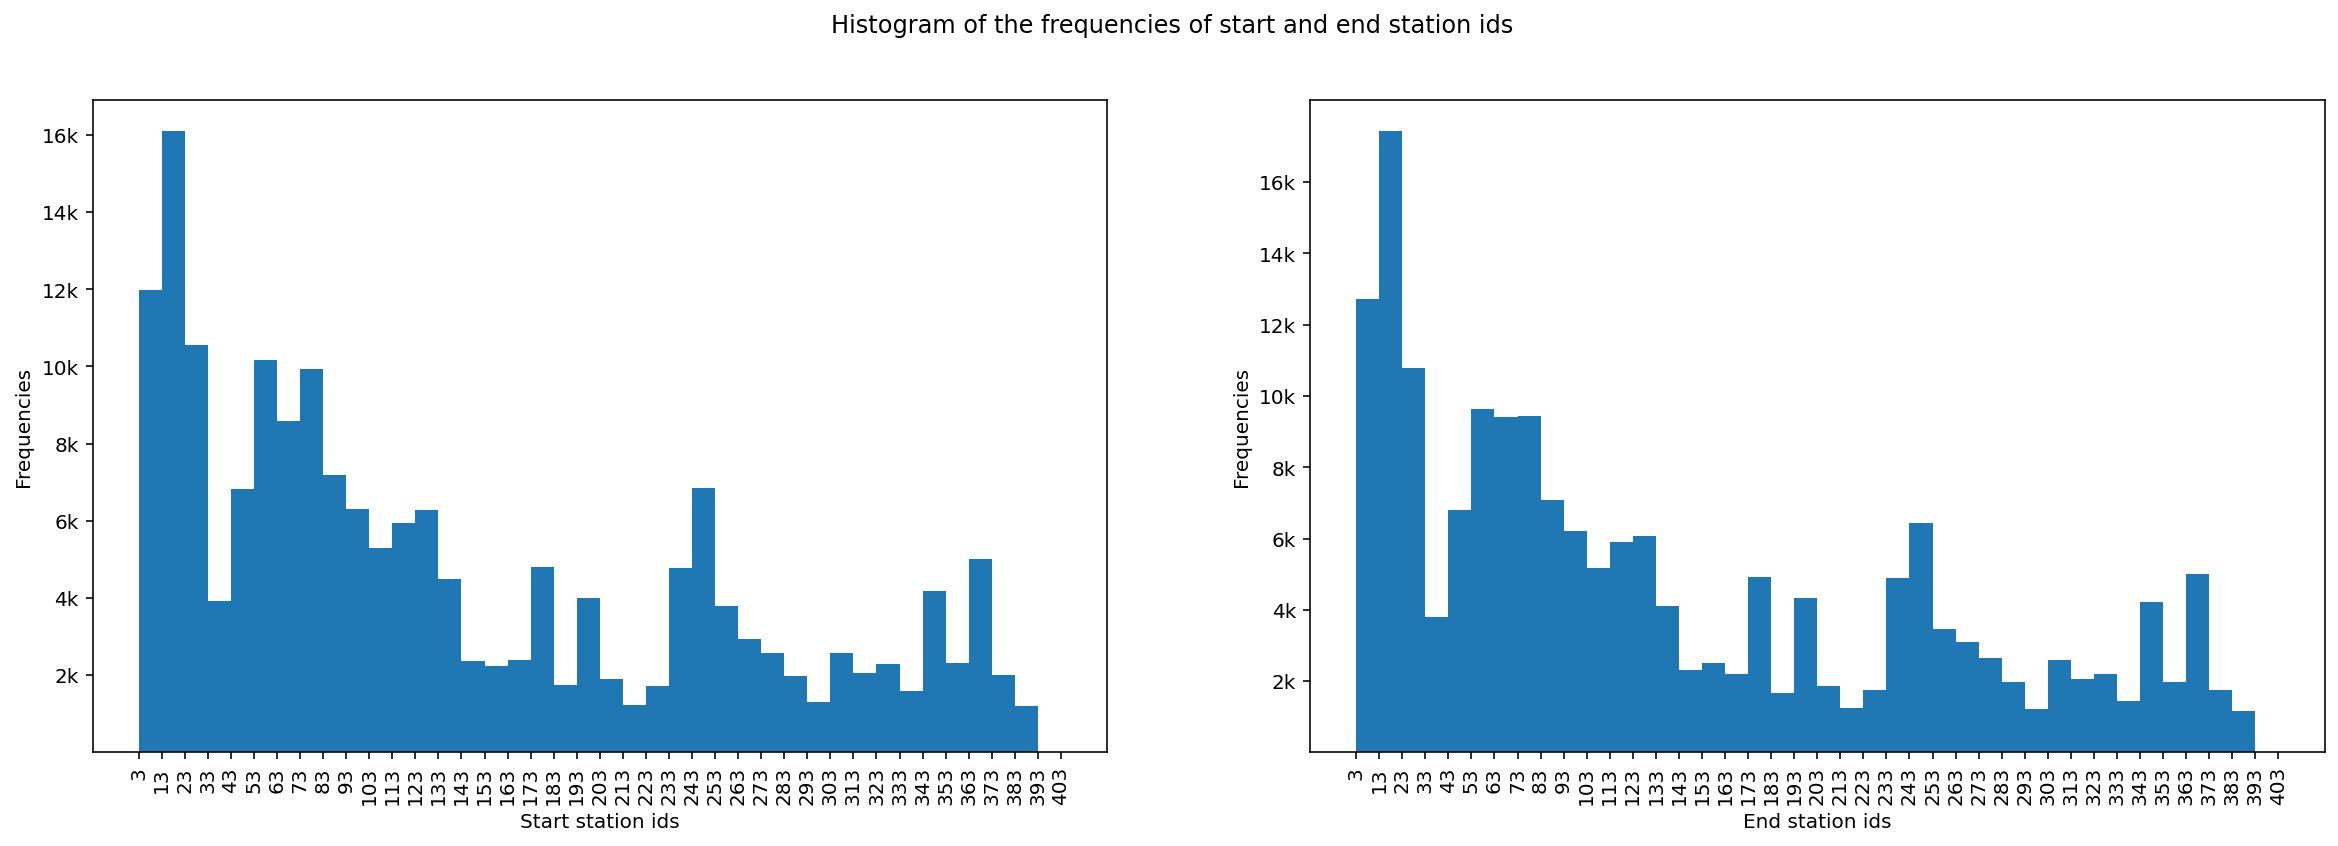

In [30]:
def trip_stations_hist():
    plt.figure(figsize=[20, 6])

    plt.subplot(121)
    bins = np.arange(3,398+10, 10)
    plt.hist(data = df, x = 'start_station_id', bins = bins);
    # plt.xlim(0,200)
    plt.xticks( np.arange(3,398+10, 10), rotation = 90);
    y_ticks = [2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]
    y_labels = ['2k', '4k', '6k', '8k', '10k', '12k', '14k', '16k']
    plt.yticks(y_ticks, y_labels);
    plt.xlabel('Start station ids')
    plt.ylabel('Frequencies')

    plt.subplot(122)
    bins = np.arange(3,398+10, 10)
    plt.hist(data = df, x = 'end_station_id', bins = bins);

    plt.xticks( np.arange(3,398+10, 10), rotation = 90);
    y_ticks = [2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]
    y_labels = ['2k', '4k', '6k', '8k', '10k', '12k', '14k', '16k']
    plt.yticks(y_ticks, y_labels);
    plt.xlabel('End station ids')
    plt.ylabel('Frequencies')
    plt.suptitle('Histogram of the frequencies of start and end station ids');
trip_stations_hist()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration sec column was not really informative, so I transformed it with log transformation. The distribution showed that 600 seconds is the most duration of trips in the dataset. Also, most of the trips are below 1000 seconds.
> Histogram plot for member_birth_year was unusual. I applied pyplot's xlim to zoom into the plot and get an insight. The plot is left-skewed and shows that majority of trips are made by members who share 1990 birth year.   

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> `start_time`, `end_time` were converted to datetime and were used to create four more columns: `trip_start_day`, `trip_end_day`, `trip_start_time` and `trip_end_time`. Without the conversion, it wouldn't have been very easy to get the date names and time 
`start_station_id`, `end_station_id`, `bike_id`, 
> Also, `user_type`, `member_gender`, and `bike_share_for_all_trip` were converted to categorical columns for easy plots as most plot types they were used wouldn't have understood them as strings.

<a id='bivariate'></a>
## Bivariate Exploration

## Question: What is the relationship between start_station_id, end_station_id vs member_birth_year?

The graphs below is are scatter plots of `member_birth_month` against `start_station_id` and `end_station_id`.
Due to plot overfit,I applied a transparency for insight.
From the graphs, we can see a large concentration of datapoints for birth years between around 1940 and 2000 across all stations

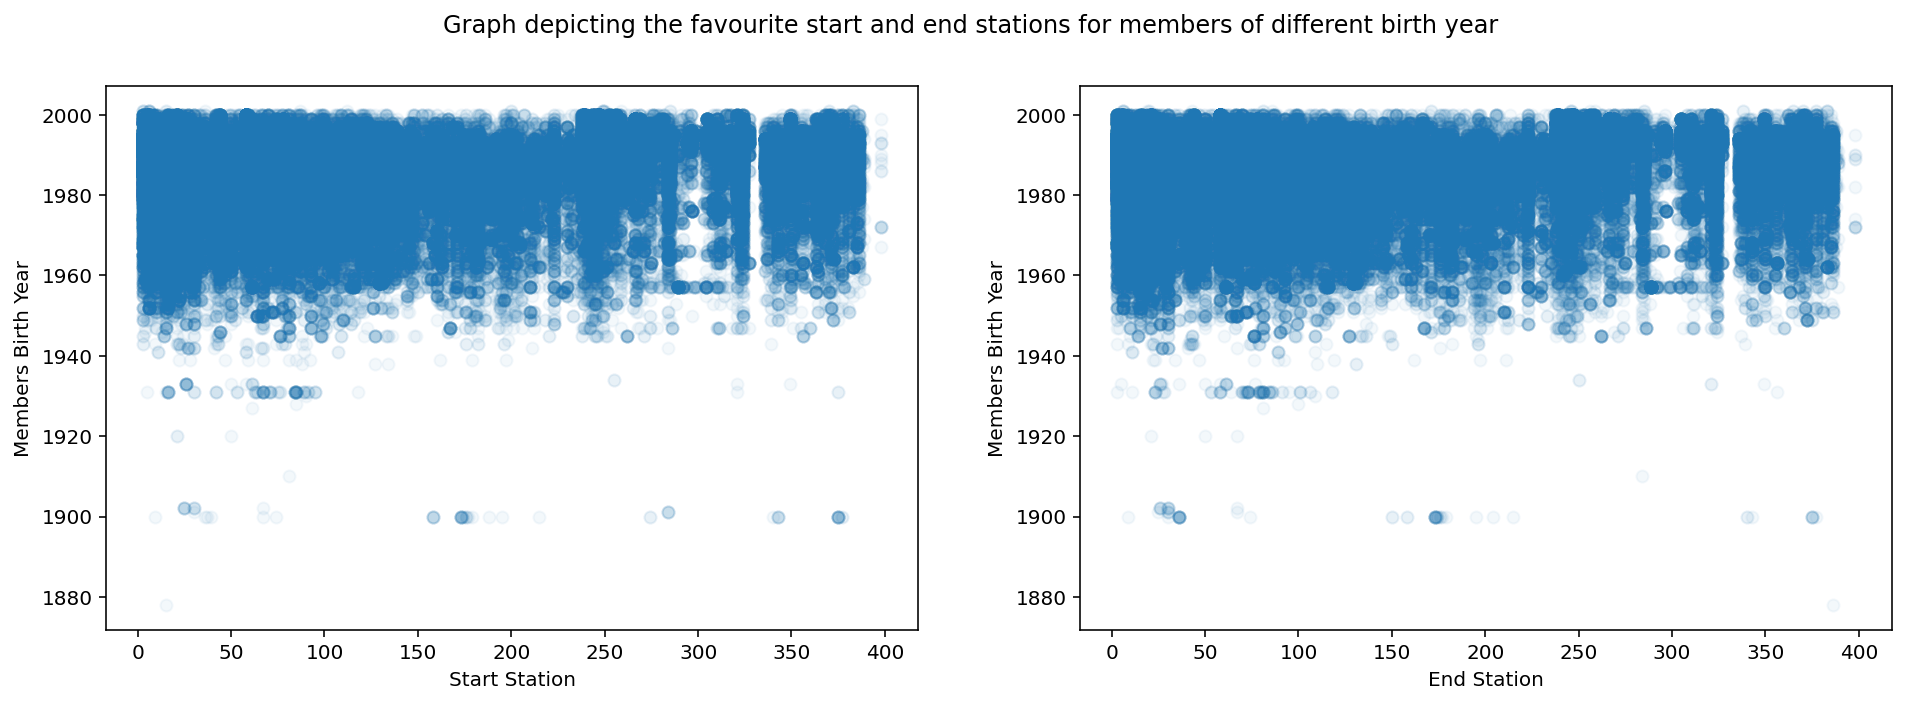

In [31]:
def start_end_station_scatter():
    plt.figure(figsize=[16,5])
    plt.subplot(121)
    plt.scatter(x = df.start_station_id, y = df.member_birth_year, alpha=1/20);
    plt.xlabel('Start Station')
    plt.ylabel('Members Birth Year')

    plt.subplot(122)
    plt.scatter(x = df.end_station_id, y = df.member_birth_year, alpha=1/20)
    plt.xlabel('End Station')
    plt.ylabel('Members Birth Year')
    plt.suptitle('Graph depicting the favourite start and end stations for members of different birth year');
start_end_station_scatter()

## Question: How are `member_birth_year` and `duration_sec` related?

Answer: The scatterplot below shows the relationship between member_birth_year and duration_sec.
As before, I have applied transparency for easy capturing of insight due to overplotting.
The graph, further affirms that majority of the travellers were born between the year 1940 and 2000.
We can also see that majority of their travelling duration is between 0 and aroud 10000 seconds

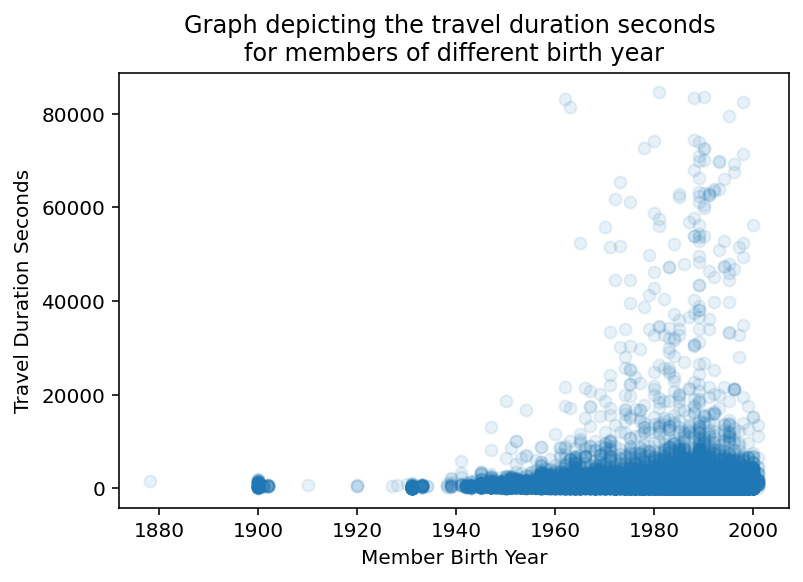

In [32]:
def birth_year_trip_dur_scatter():
    plt.scatter(x = df.member_birth_year, y = df.duration_sec, alpha=1/10);

    plt.xlabel('Member Birth Year')
    plt.ylabel('Travel Duration Seconds')
    plt.title('Graph depicting the travel duration seconds \nfor members of different birth year');
birth_year_trip_dur_scatter()

## Question: How are `bike_id` and `duration_sec` related?

Answer: The scatterplot below shows the relationship between bike_id: x_axis and duration_sec: y_axis. I applied transparency for easy spotting of trends.
The graph shows that most durations of trip for all bike ids are below around 1000 seconds.

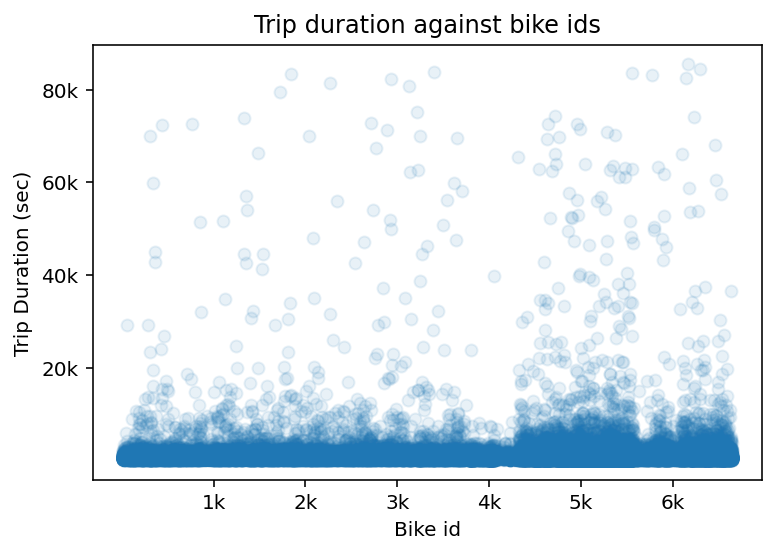

In [33]:
def trip_duration_bike_scatter():
    plt.scatter(x = df.bike_id, y = df.duration_sec, alpha=1/10);
    x_ticks = [1000,2000,3000,4000,5000,6000]
    x_label = ['1k', '2k', '3k', '4k', '5k', '6k']
    y_ticks = [20000, 40000, 60000, 80000]
    y_labels = ['20k', '40k', '60k', '80k']
    plt.xticks(x_ticks, x_label)
    plt.yticks(y_ticks, y_labels)
    plt.xlabel('Bike id')
    plt.ylabel('Trip Duration (sec)')
    plt.title('Trip duration against bike ids');
trip_duration_bike_scatter()

## Question: How is user_type related to bike_share_for_all_trip?

Here, I used Pandas's crosstab method to summarise the proportion of two qualitative variables: `user_type` and `bike_share_for_all_trip`. 
Then I used a clustered bar chart to visualise their relationship. 
As can be seen, about 1% of Customers do not share bike for all trip, no customer shares bike. 
About 80% of Subscribers do not share bike, while about 1% of subscribers share.

In [34]:
user_type_bike_prop = pd.crosstab(index= df.user_type, columns= df.bike_share_for_all_trip)/len(df)
user_type_bike_prop

bike_share_for_all_trip,No,Yes
user_type,,
Customer,0.108324,0.000000
Subscriber,0.797031,0.094645


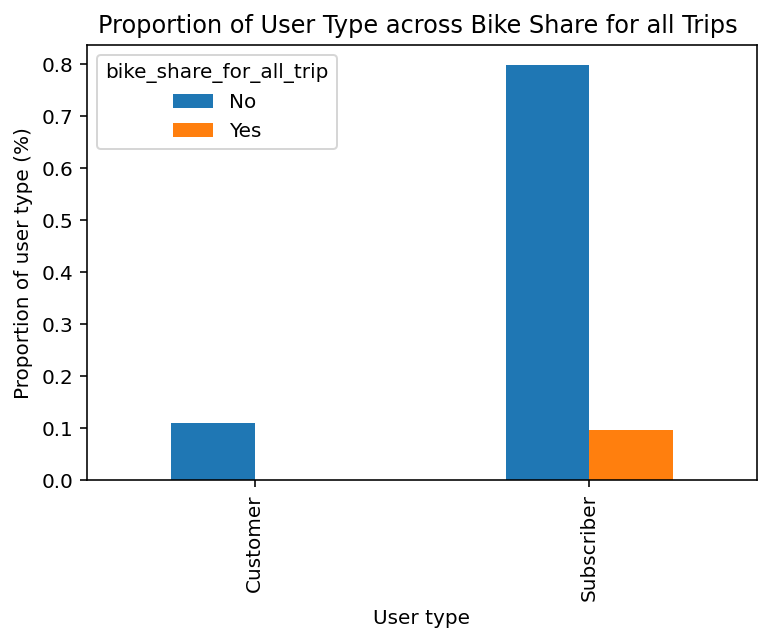

In [35]:
def prop_user_type_bar():
    user_type_bike_prop.plot(kind = 'bar');
    plt.xlabel('User type')
    plt.ylabel('Proportion of user type (%)');
    plt.title('Proportion of User Type across Bike Share for all Trips ');
prop_user_type_bar()

## Question: How is member_gender related with user_type?

I still followed similar approach as above.
I used Pandas's crosstab method to summarise the proportion of two qualitative variables: `user_type` and `member_gender`. 
Then I used a clustered bar chart to visualise their relationship. 
For customers: about 3% are Female, 6.3% are Male, and 0.2% are Other. 
For Subscribers: about 20% are Female, 65% are Male, and 2% are Other.
About 6.3% unaccounted for data are NaNs.

In [36]:
user_type_gender_prop = pd.crosstab(index= df.member_gender, columns= df.user_type)/len(df)

user_type_gender_prop

user_type,Customer,Subscriber
member_gender,,
Female,0.025336,0.197353
Male,0.062858,0.649478
Other,0.002481,0.017431


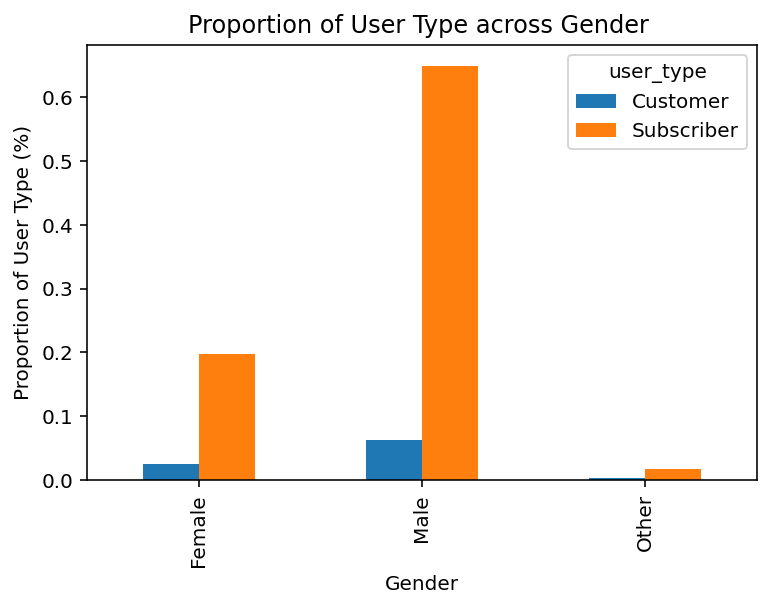

In [37]:
def prop_user_type_bar():
    user_type_gender_prop.plot(kind = 'bar');
    plt.xlabel('Gender')
    plt.ylabel('Proportion of User Type (%)');
    plt.title('Proportion of User Type across Gender ');
prop_user_type_bar()

## Question: What is the most favourite bike id by member_birth_year 

Answer: The heat map displayed below shows the relationship between member_birth_year and bike_id.
The colour bar displays colours from least (down), to maximum values (up).
I applied annotation for interpretability.
Bike ids have a frequency of atleast 12000 and above between the years 1980 and  around 2000, with the maximum value in the purple cell with value 65227.
This means that members who were born between the years 1980 and  around 2000 travel most frequently with bikes, and the most frequent bike_ids are between 5000 and 6000 

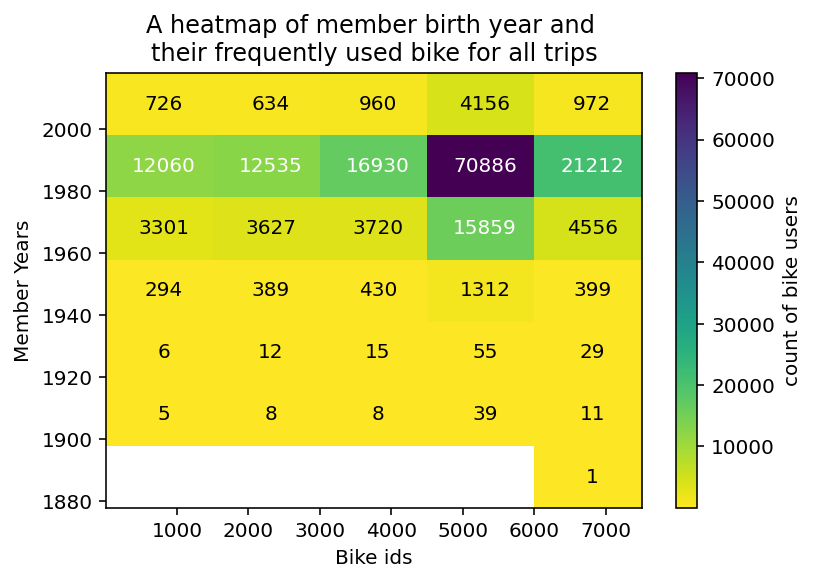

In [38]:
def used_bikes_by_years_hist2d():
    # Form bins for both axes
    x_bins = np.arange(11, 6645+1500, 1500)
    y_bins = np.arange(1878, 2001+20, 20)

    # Make heatmap plot
    h2d = plt.hist2d(x= df.bike_id, y = df.member_birth_year, bins= [x_bins, y_bins], cmin=.5, cmap = 'viridis_r');
    plt.colorbar(label = 'count of bike users');
    plt.xlabel('Bike ids')
    plt.ylabel('Member Years')
    plt.title('A heatmap of member birth year and \ntheir frequently used bike for all trips')


    counts = h2d[0]

    for i in range(counts.shape[0]):
        for j in range(counts.shape[1]):
            c = counts[i,j]

            if c >= 10000: 
                plt.text(x_bins[i]+800, y_bins[j]+10, int(c),
                         ha = 'center', va = 'center', color = 'white')
            elif c > 0:
                plt.text(x_bins[i]+800, y_bins[j]+10, int(c),
                         ha = 'center', va = 'center', color = 'black');
used_bikes_by_years_hist2d()

In [39]:
df.end_station_id.min(), df.end_station_id.max()

(3.0, 398.0)

In [40]:
df.start_station_id.min(), df.start_station_id.max()

(3.0, 398.0)

## Question: What is the relationship between `end_station_id` and `start_station_id`

Answer: The heat map displayed below shows the relationship between `end_station_id` on x_axis and `start_station_id` on y_axis. The colour bar displays colours as above.
There seems to be a linear relationship of the most frequent stations between 0 and around 300 on both axes.

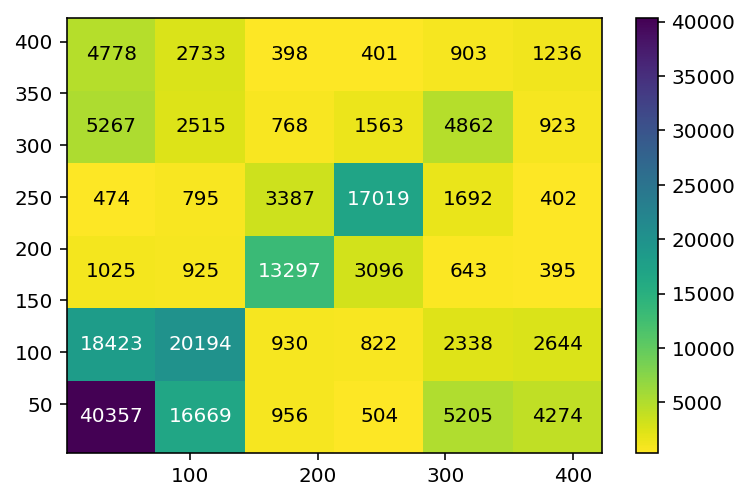

In [41]:
def freq_start_end_station_ids_hist2d():
    # Form bins for both axes
    x_bins = np.arange(3,398+70, 70)
    y_bins = np.arange(3,398+70, 70)

    # Make heatmap plot
    h2d = plt.hist2d(data=df, x = 'end_station_id', y = 'start_station_id', cmin = 200, cmap = 'viridis_r', bins = [x_bins, y_bins]);
    plt.colorbar();

    counts = h2d[0]

    for i in range(counts.shape[0]):
        for j in range(counts.shape[1]):
            c = counts[i,j]

            if c >= 10000: 
                plt.text(x_bins[i]+35, y_bins[j]+35, int(c),
                         ha = 'center', va = 'center', color = 'white')
            elif c > 0:
                plt.text(x_bins[i]+35, y_bins[j]+35, int(c),
                         ha = 'center', va = 'center', color = 'black');
freq_start_end_station_ids_hist2d()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship between bike_id and duration_sec shows that most durations of trips for all bike ids are below around 1000 seconds.
> `member_birth_month` relates with `start_station_id` and `end_station_id`. The relationships show a large concentration of datapoints for birth years between around 1940 and 2000 across all stations.
> `member_birth_month` also relates `bike_id`. Their relationship shows that members who were born between the years 1980 and  around 2000 travel most frequently with bikes, and the most frequent bike_ids are between 5000 and 6000.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes: 
1. `end_station_id` and `start_station_id` relationship shows a linear relationship of the most frequent stations between 0 and around 300.
2. There is a relationship between `member_gender` and `user_type`. The result shows that: For customers: about 3% are Female, 6.3% are Male, and 0.2% are Other. For Subscribers: about 20% are Female, 65% are Male, and 2% are Other. About 6.3% unaccounted for data are NaNs.
3. The relationship between user_type related and bike_share_for_all_trip shows that about 1% of Customers do not share bike for all trip, no customer shares bike. About 80% of Subscribers do not share bike, while about 1% of subscribers share.

<a id='multivariate'></a>
## Multivariate Exploration

## What is the distribution of `member_gender` across `member_birth_year` and `duration_sec`?

Answer: I used Seaborn's FacetGrid method to plot the distribution. For each gender, the instance of the FacetGrid method is used to plot a scatterplot of duration_sec vs member_birth year. 
To avoid From the plots, we can see that male has the highest distribution, followed by female. Interestingly, as expected, Other has the least, but its records concentrate around 1960s to 2000.

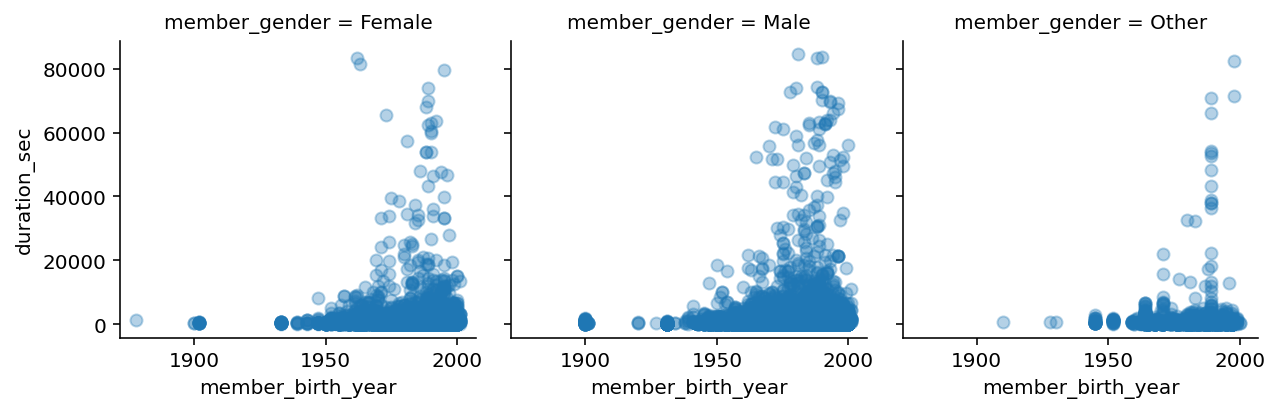

In [42]:
# Plot FacetGrid
def facet_grid_1():
    g = sns.FacetGrid(data = df, col= 'member_gender');
    g.map(plt.scatter, 'member_birth_year', 'duration_sec', alpha = 1/3);
facet_grid_1()

## Why do subscribers have more distribution than customers?

Answer: The graphs below are scatterplots showing the relationship between member's birth year and start station id. I used FacetGrid to plot these graphs based on the distribution of user types across them. As can be seen, subscriber is more because it has members of birth year from 1940 to 2000. Customer only have members from 1950 to 2000.

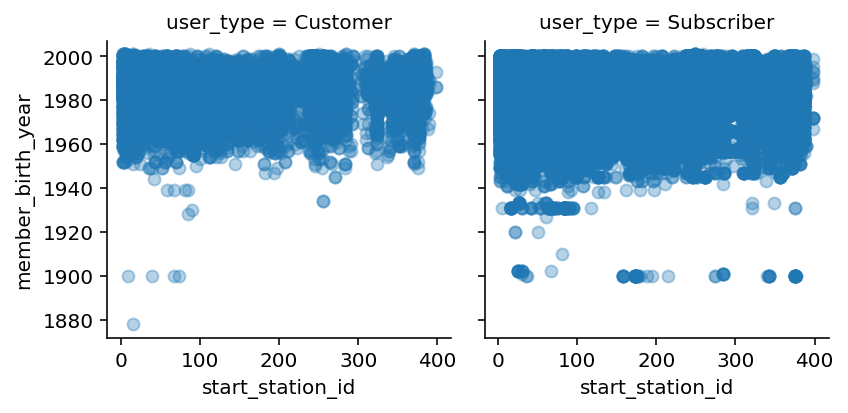

In [43]:
def facet_grid_2():
    # Plot FacetGrid
    g = sns.FacetGrid(data = df, col = 'user_type')
    g.map(plt.scatter, 'start_station_id', 'member_birth_year', alpha = 1/3);
facet_grid_2()

## Does duration contribute to subscribers having more distribution than customers?

Answer: The graphs below are scatterplots showing the relationship between member's birth year and trip duration.
Due to plot overfit, I used a sample of 300 records from the dataset just to get an insight. Then, I used FacetGrid to plot these graphs based on the distribution of user types across them. As can be seen, the datapoints are unformly distributed. So duration does not contribute to subscriber's dominance.

In [44]:
np.random.seed(1000)
sample = np.random.choice(df.shape[0], 300, replace = False)
sample_data = df.loc[sample]
sample_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,trip_start_time,end_day,trip_end_time
157490,160.0,2019-02-05 21:49:41.533,2019-02-05 21:52:21.993,56.0,Koshland Park,37.773414,-122.427317,58.0,Market St at 10th St,37.776619,-122.417385,4838,Subscriber,1992.0,Male,No,Tuesday,21:49:41.533000,Tuesday,21:52:21.993000
71471,700.0,2019-02-19 17:23:25.769,2019-02-19 17:35:06.498,81.0,Berry St at 4th St,37.77588,-122.39317,126.0,Esprit Park,37.761634,-122.390648,1466,Customer,1992.0,Male,No,Tuesday,17:23:25.769000,Tuesday,17:35:06.498000
43721,1324.0,2019-02-22 15:56:43.857,2019-02-22 16:18:48.317,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,1085,Customer,NaN,NaN,No,Friday,15:56:43.857000,Friday,16:18:48.317000
104036,353.0,2019-02-14 09:10:18.779,2019-02-14 09:16:12.159,294.0,Pierce Ave at Market St,37.327581,-121.884559,327.0,5th St at San Salvador St,37.332039,-121.881766,4299,Subscriber,1993.0,Male,Yes,Thursday,09:10:18.779000,Thursday,09:16:12.159000
176730,503.0,2019-02-02 10:35:51.591,2019-02-02 10:44:14.918,86.0,Market St at Dolores St,37.769305,-122.426826,100.0,Bryant St at 15th St,37.7671,-122.410662,4842,Subscriber,1974.0,Male,No,Saturday,10:35:51.591000,Saturday,10:44:14.918000


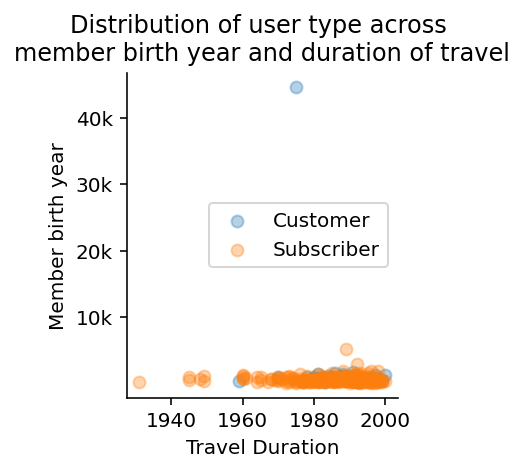

In [45]:
def facet_grid_3():
    g = sns.FacetGrid(data = sample_data, hue = 'user_type')
    g.map(plt.scatter, 'member_birth_year', 'duration_sec', alpha = 1/3)

    y_ticks = [10000, 20000, 30000, 40000]
    y_labels = ['10k', '20k', '30k', '40k']
    plt.yticks(y_ticks, y_labels);
    plt.xlabel('Travel Duration')
    plt.ylabel('Member birth year')
    plt.title('Distribution of user type across \nmember birth year and duration of travel');
    plt.legend();
facet_grid_3()

## Question: Why don't travellers share bike enough?

Answer: The graph below is a scatterplot showing the relationship between member's birth year and bike id.
I used a sample of 300 records as above. Then, I used FacetGrid to plot these graphs based on the distribution of bike_share_for_all_trip across them. As can be seen, most shared and unshared bike ids fall within 4000 to 6000, so this is not a problem. The problem is most likely birth year members, because No dominates over Yes from around 1970 up.

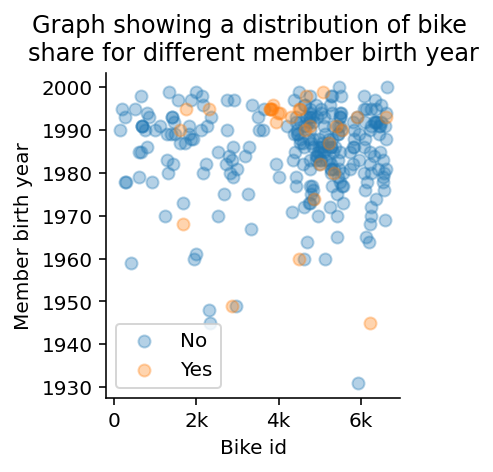

In [46]:
def facet_grid_4():
    # Plot FacetGrid
    g = sns.FacetGrid(data = sample_data, hue = 'bike_share_for_all_trip')
    g.map(plt.scatter, 'bike_id', 'member_birth_year', alpha = 1/3)

    x_ticks = [0, 2000, 4000, 6000]
    x_labels = ['0', '2k', '4k', '6k']
    plt.xticks(x_ticks, x_labels);
    plt.xlabel('Bike id')
    plt.ylabel('Member birth year')
    plt.title('Graph showing a distribution of bike \nshare for different member birth year');
    plt.legend(ncol = 1);
facet_grid_4()

## Question: How does `bike_id` and `member_birth_year` relate with `member_gender`, `user_type`,  and `bike_share_for_all_trip`

Answer: To answer this question, I used Seaborn's PairGrid method to perform a pair plot with the numerical variables on the y_axis and categorical variables on the x_axis. 
Here is the result: There are a lot of outliers althrough the dataset.
`member_gender` against `bike_id`: we have three genders: male, female, and other. The three genders have fairly same median (around 5000), and Q3, although Q1 of Female is the least while that of Other is the highest.
    
`member_birth_year` vs `member_gender`: There seems to be a uniform distribution. It indicates that most people in `member_gender` column were born in 1950s and 2000.
`user_type` vs `bike_id`: There are two categories; Customer and Subscriber. Subcriber has a slight higher median than Customer and fairly same Q3, but Customer has a lower Q1.
`user_type` vs `member_birth_year`: There's fairly an even distribution just like that of `member_birth_year` vs `member_gender`

`bike_share_for_all_trip` vs `bike_id`: There are two categries: yes and no. No has higher median and Q3 than Yes but lower Q1
`bike_share_for_all_trip` vs `member_birth_year`:There is fairly same Q1, but Yes has higher median and Q3 than No. This means those who were born in late 1990s frequently share bike for all trips.

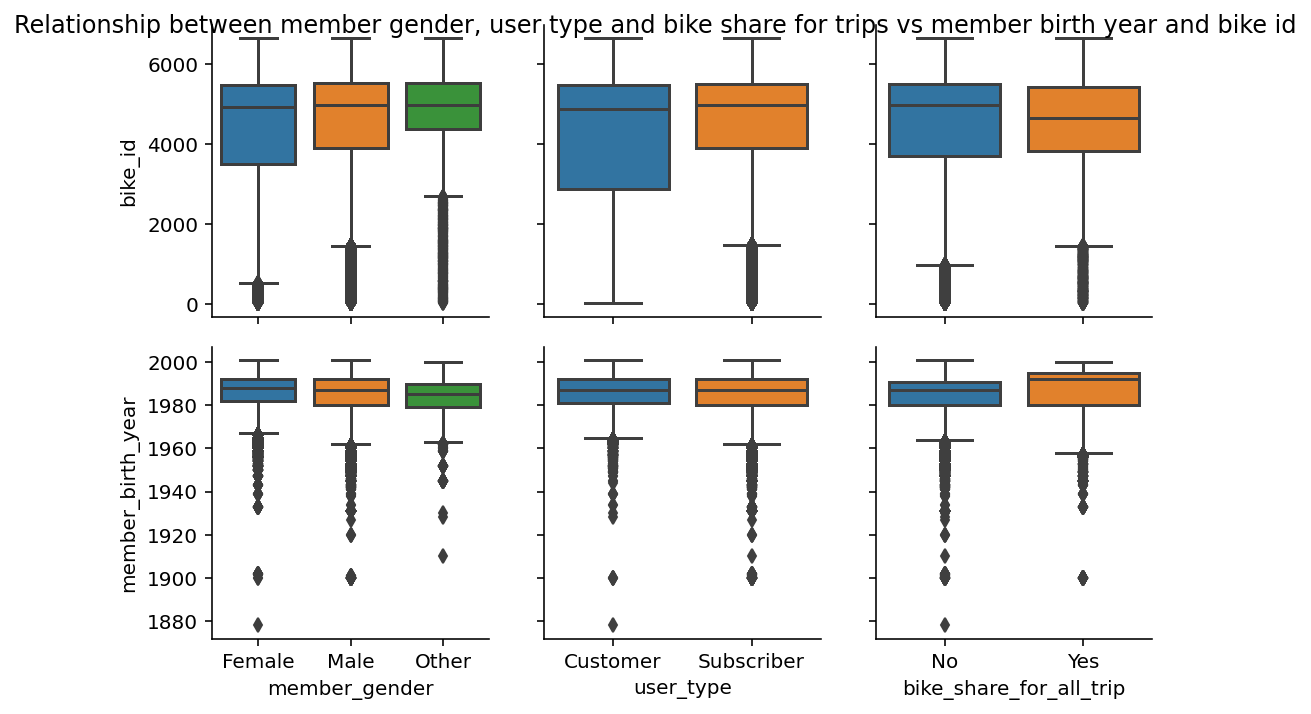

In [47]:
# Plot FacetGrid
def pair_grid():
    g = sns.PairGrid(data = df, y_vars = ['bike_id', 'member_birth_year'],
                     x_vars = ['member_gender', 'user_type', 'bike_share_for_all_trip'])
    g.map(sns.boxplot);
    plt.suptitle('Relationship between member gender, user type and bike share for trips vs member birth year and bike id');
pair_grid();


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Relationships here look pretty much like those in bivariate visualisation.

### Were there any interesting or surprising interactions between features?

> There is a relationship between `bike_share` and `member_gender`. The three genders have fairly same median (around 5000) of favourite bike ids, and third quartile, although first quartile value for Female is the least while that of Other is the biggest. This means that female gender is most frequent with lower bike ids while Other is most frequent with higher bike_ids.  

<a id='conclude'></a>
## Conclusions
> After much explorations, here are conclusions:
1. Thursday is the busiest day of trips while Saturday is the least.
2. Most trips duration is 600 seconds.
3. Busiest trip take-off and ending time is 17:00 and 03:00 is the least.
4. Majority of trippers were born between 1950s and 2000
5. Subscribers make trips more than customers with a ratio of 166k to about 18k respectively.
6. Subscribers dominate because they have members of birth year between 1940 to 2000. Customer only have members from 1950 to 2000.
7. Trip duration does not contribute to subscriber's dominance
8. The most frequent stations ids are between 0 and around 300
9. The most frequent bike_ids are between 5000 and 6000 
10. About 1% of Customers do not share bike for all trip, no customer shares bike. About 80% of Subscribers do not share bike, while about 1% of subscribers share.
11. Majority of trips are made by members who share 1990 birth year.